<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# ***Projeto N2 - Inteligência Artificial***
---

In [108]:
#@title Identificação do Grupo

#@markdown Turma **7N**

#@markdown Integrantes do Grupo (*informe \<TIA\>,\<nome\>*)
Aluno1 = '31944043, Giancarlo Ponte Gamberi' #@param {type:"string"} 
Aluno2 = '31938698, Rone' #@param {type:"string"}




# Metodologia 

- Tratamento dos dados
- Treinamento dos dados
- Aplicação do modelo de Arvore de decisão
- Plotagem dos Dados
- Analisar resultados



# Resultados

A predição feita pela Árvore de Decisão foi boa, com 0.97 de precisão, porém não possui uma visualização dos dados agradável.


# **Implementação**

In [94]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import warnings
import os
warnings.filterwarnings("ignore") 
sns.set()
from sklearn import neighbors
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Base de Dados 

Base de dados sobre dados problemas em maquinas (https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification), na coluna failure contem o tipo de erro (infelizmente a base esta um pouco desproporcional, onde 97% dos dados demonstram nao haver erro, para tentar equilibrar isto, removeremos uma parte destes dados), os dados nao interessantes serao removidos (UDI por se tratar do index empregado e o product ID), o type, que representa o tipo de maquinario, sera convertido para numerico, e por fim, outra coluna que sera descartada eh a Target, pois ela binariza os casos onde ha falha, e os que nao ha, como a intencao eh uma classificacao multiclasse, nao eh interessante para nos.




In [96]:
df = pd.read_csv('./star_classification.csv')
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


Nao haviam dados nulos, como visto abaixo:

In [97]:
maquina = df.dropna()
maquina

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [98]:
maquina = maquina.drop(columns=['obj_ID','run_ID','rerun_ID','field_ID','plate','fiber_ID','spec_obj_ID','cam_col','MJD']) #tudo o que for Identificadores


In [100]:
#evidenciando as estatísticas da tabela
maquina.describe() 

,alpha,delta,u,g,r,i,z,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,0.576661
std,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,0.730707
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,-0.009971
25%,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,0.054517
50%,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,0.424173
75%,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,0.704154
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245


In [101]:
#Separando oq tem erro e oq nao tem
x = maquina.drop(columns=['class'])
y = maquina['class']
seed = 2147483647 #seed pré-determinada para validações no futuro

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state = seed)

In [104]:
# Declarando o Modelo
clf = DecisionTreeClassifier(criterion='gini',
                             min_samples_leaf=5,
                             min_samples_split=5,
                              max_depth=None,
                              random_state=seed)
clf.fit(x_train, y_train)                  
# Emprega o conjunto de treinamento 

y_pred = clf.predict(x_test)

y_pred

array(['QSO', 'GALAXY', 'GALAXY', ..., 'GALAXY', 'STAR', 'GALAXY'],
      dtype=object)

[Text(0.37693674190945736, 0.9827586206896551, 'X[7] <= 0.004\ngini = 0.564\nsamples = 70000\nvalue = [41611, 13273, 15116]'),
 Text(0.044890263870520815, 0.9482758620689655, 'X[7] <= -0.0\ngini = 0.044\nsamples = 15467\nvalue = [348, 3, 15116]'),
 Text(0.01585427293910196, 0.9137931034482759, 'X[7] <= -0.004\ngini = 0.006\nsamples = 9562\nvalue = [31, 0, 9531]'),
 Text(0.014846652811889918, 0.8793103448275862, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(0.016861893066314, 0.8793103448275862, 'X[7] <= -0.002\ngini = 0.005\nsamples = 9556\nvalue = [25, 0, 9531]'),
 Text(0.006045720763272247, 0.8448275862068966, 'X[3] <= 24.847\ngini = 0.144\nsamples = 64\nvalue = [5, 0, 59]'),
 Text(0.005038100636060206, 0.8103448275862069, 'X[4] <= 22.068\ngini = 0.097\nsamples = 59\nvalue = [3, 0, 56]'),
 Text(0.0030228603816361234, 0.7758620689655172, 'X[7] <= -0.004\ngini = 0.04\nsamples = 49\nvalue = [1, 0, 48]'),
 Text(0.0020152402544240822, 0.7413793103448276, 'X[6] <= 19.809\ngini = 0.1

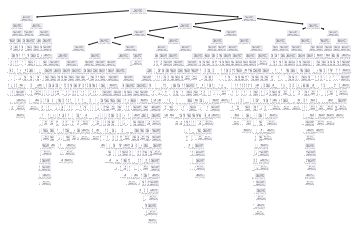

In [105]:
from sklearn import tree

#plotando a árvore (demora um tempo)
tree.plot_tree(clf)

In [106]:
import graphviz

#embelezando a árvore de decisão
dot_data = tree.export_graphviz(clf, out_file=None, filled=True,leaves_parallel=True,rounded=True) 
graph = graphviz.Source(dot_data) 
graph

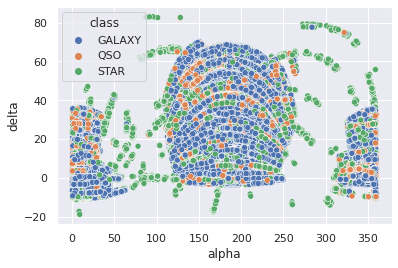

In [107]:
sns.scatterplot(x=maquina["alpha"],y=maquina["delta"],hue=maquina["class"])